Generate 100 random data sets of plants where mean fruit_length does follows your linear model created in model_height.

This means the "loc" for each plant is determined by the model, but the actual value is random, with the mean coming from that loc.

For each of the 100 data sets, fit the linear model again and get the slope. Then, after you obtain your 100 slopes, make a histogram of the slopes, and obtain the standard deviation and the lowest and highest slope.

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, statsmodels.api as sm
from scipy.stats import bernoulli
sns.set_theme()
from scipy.stats import norm
geno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_geno.csv", sep=",",skiprows=3,index_col=0)
pmap = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pmap_tair9.csv", sep=",",skiprows=3,index_col=0)
pheno = pd.read_table("arabidopsis_birds/arabmagic/arabmagic_pheno.csv", sep=",",skiprows=3,index_col=0)
counts = pd.read_table("arabidopsis_birds/eco_data/species_counts.txt")
sites = pd.read_table("arabidopsis_birds/eco_data/eco_sites.txt")
fruit_length_geno = pd.read_table("fruit_length_geno.csv",sep=",")
gwas_plus_pmap = pd.read_table("gwas_plus_pmap.csv",sep=",")
# imports

In [13]:
to_model = pd.DataFrame({"fruit_length":fruit_length_geno['fruit_length'],
                         "height": fruit_length_geno['height']})
to_model = to_model.loc[pd.isnull(to_model).sum(axis=1)==0, :]
to_model = sm.add_constant(to_model)
# We create a data frame called to model, with three columns. The first being fruit length, the second being height, and the third being a constant.
# we us isnull to remove any lines that have no value.

X = to_model.loc[:,['const','height']]
y = to_model['fruit_length']
model_height = sm.OLS(y, X).fit()
# sets an x and y values that will be used in our linear model then plugs them in
# our x values will consist of heights (which will change), and a constant.
# our y values will consist of fruit length

gen = model_height.predict()
# we create an array of mean fruit length for a given height.

model_height.summary()
# prints a summary of the above created model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           fruit_length   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     77.44
Date:                Tue, 29 Nov 2022   Prob (F-statistic):           2.13e-17
Time:                        11:33:18   Log-Likelihood:                -980.16
No. Observations:                 511   AIC:                             1964.
Df Residuals:                     509   BIC:                             1973.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.9419      0.336     35.532      0.000      11.282      12.602
height         0.0691      0.008      8.800      0.000       0.054       0.085
==============================================================================
Omnibus:                        0.078   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.962   Jarque-Bera (JB):                0.107
Skew:                          -0.030   Prob(JB):                        0.948
Kurtosis:                       2.961   Cond. No.                         197.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

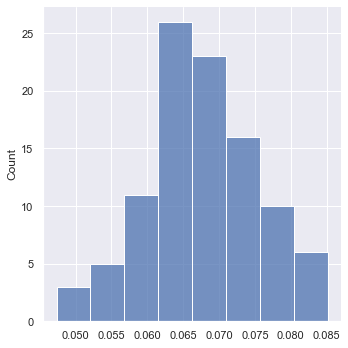

In [11]:
slopes = []
# create an empty list called slopes

for x in range(100):
    # counts to one hundred outputting what count its on running the indented code each time.

    to_model[x] = norm(loc = gen, scale = to_model['fruit_length'].std()).rvs()
    # using norm we create an output of values similar to our fruit_length that fall within the normal plot

    X = to_model.loc[:,['const','height']]
    y = to_model[x]
    tmod = sm.OLS(y, X).fit()
    # same as above:
        # sets an x and y values that will be used in our linear model then plugs them in
        # our x values will consist of heights (which will change), and a constant.
        # our y values will consist of our similar generated fruit lengths

    slopes.append(tmod.params[1])
    # we add the slope (params 1) to our list of slopes

sns.displot(data=np.array(slopes))
# we convert our list into an array then make a histogram from it

In [12]:
print(f'The standard deviation is {np.array(slopes).std()}, the smallest slope is {np.array(slopes).min()} and the largest slope is {np.array(slopes).max()}.')
# we convert our list to a numpy array before finding standard dev, max, and min those apportions cannot be performed on a list.

The standard deviation is 0.007839170016826665, the smallest slope is 0.047343595748066326 and the largest slope is 0.08515009404577291.


Write ONE SENTENCE that compares the standard deviation, lowest, and highest value in your histogram to the model_height.summary() output values that include std err, and [0.025, 0.975] (the lowest and highest end of the confidence interval) for the slope.

In [14]:
# All of our slopes fall within the confidence interval (as the lowest of 0.047 is well above 0.025 and the highest 0.085 is well below 0.097) Our average from the histogram was right around 0.065 which about where the true slope is (0.069).